In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Business Analyst Workflow with Vertex Extensions

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_extensions/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_extensions%2Fbusiness_analyst_workflow_vertexai_extensions.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/main/genai-on-vertex-ai/vertex_extensions/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/tree/main/genai-on-vertex-ai/vertex_extensions/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | [Lei Pan](https://github.com/genaimagician)|
| Reviewers(s) | [Meltem Subasioglu](https://github.com/5Y5TEM)|
| Last updated | 2024-04-08: Initial Publication |

## Overview

In this notebook, we will show you how to use vertex code and search extensions to complete a housing investment opportunities research report for business stakeholders including the following steps:

- Creating a pre-built code interpreter extension in your project
- Using code interpreter to analyze housing data
- Creating and using vertex AI search extension to research on housing investment opportunities
- Automatically add back the data analysis and research to your google slide with sheet API and slide API
- Email slide link to stakeholders with gmail API

▶ If you're already familiar with Google Cloud and the Vertex Extensions Code Interpreter Extension, you can skip reading between here and the "**Getting Started**" section.

### Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

### Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment. It lets you generate and execute Python code to:

* Analyze, clean, transform, and reshape your datasets
* Visualize data in charts and graphs
* Execute calculations

### Vertex AI Extensions Search Extension

The Vertex AI [Search](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions#vertex_ai_search_extension) extension lets you access and search website corpuses and unstructured data to provide relevant responses to natural language questions, such as:

* "How did the competitive threats for the company change from Q1 of last year to Q1 of this year?"
* "What parts of the company are growing the fastest? How fast?"

### Using this Notebook

Colab is recommended for running this notebook, but it can run in any iPython environment where you can connect to Google Cloud, install pip packages, etc.

If you're running outside of Colab, depending on your environment you may need to install pip packages (like pandas) that are included in the Colab environment by default but are not part of the Python Standard Library. You'll also notice some comments in code cells that look like #@something -- these may contain informative text

This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* Google Slide API
* Google Sheet API
* Gmail API

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.4.7

### Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your Queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter uses Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).
4. The Code Interpreter Extension is stateless and therefore every request to Code Interpreter does not have knowledge of previous operations nor files injested or produced in previous steps. Therefore, with any request to Code Interpreter you need to submit all files and instructions for that request to complete successfully.


## Getting Started


### Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

### Google Cloud Permissions
Make sure you have been [granted the following roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access) for the GCP project you'll access from this notebook:
* [`roles/aiplatform.user`](https://cloud.google.com/vertex-ai/docs/general/access-control#aiplatform.user)

### Install Vertex AI SDK and other required packages


In [ ]:
!pip install google-cloud-aiplatform --upgrade

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Outside of Colab: Install the Google Cloud CLI

If you are running this notebook in your own environment, you need to install the [Cloud SDK](https://cloud.google.com/sdk) (aka `gcloud`).

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
import vertexai

PROJECT_ID = "your project id"  # @param {type:"string"}
REGION = "your region"  # @param {type: "string"}
API_ENV = "aiplatform.googleapis.com"  # @param {type:"string"}
!gcloud config set project {PROJECT_ID}


vertexai.init(
    project=PROJECT_ID,
    location=REGION,
    api_endpoint=f"{REGION}-{API_ENV}",
)

Updated property [core/project].


## Using Extensions to Complete a Housing Research Report for Business Stakeholders Tutorial

### Import libraries

In addition to vertex ai libraries, you need to follow the instruction below to set up tokens to use slide, sheet, and gmail APIs.
- Please follow [this example](https://developers.google.com/people/quickstart/python#enable_the_api) to set up credentials and token.json to use Google slides, sheet, and gmail APIs. [More on creating credentials](https://developers.google.com/workspace/guides/create-credentials#oauth-client-id). [Credentials setup video](https://www.youtube.com/watch?v=A3838fq6j4U)
- Once you get token.json, please upload it to the colab folder on the left so that it's in the runtime for you to use.
- Please create a google sheet and slide and replace all the slide ids and sheet ids in this notebook with yours. This is the [slide template](https://docs.google.com/presentation/d/15z20CP574Vb3AMU72g_C2Z25taY78aVZ0n3xhE4I8sY/edit) and [sheet template](https://docs.google.com/spreadsheets/d/1VURqw88fJf6JreqKmFQwjveHhkQo3r-dyQwX5kh4hjE) I use for this notebook.


In [ ]:
from vertexai.preview import extensions
from vertexai.generative_models import GenerativeModel
import ast
import os.path
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import base64
from email.message import EmailMessage
import google.auth
import uuid
import io
import json
import pprint
import numpy as np
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Struct
from PIL import Image
from IPython.display import display
scopes=["https://www.googleapis.com/auth/spreadsheets","https://www.googleapis.com/auth/gmail.send","https://www.googleapis.com/auth/gmail.compose","https://www.googleapis.com/auth/gmail.modify","https://www.googleapis.com/auth/presentations"]
creds = Credentials.from_authorized_user_file("token.json", scopes)


### Step 1: Create a Code Interpreter Extension

Now you can create the extension itself. The following cell uses the Python SDK to import the extension (thereby creating it) in Vertex AI Extensions.

In [ ]:
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

INFO:vertexai.extensions._extensions:Creating Extension
INFO:vertexai.extensions._extensions:Create Extension backing LRO: projects/656421903914/locations/us-central1/extensions/583708732953722880/operations/941981332689387520
INFO:vertexai.extensions._extensions:Extension created. Resource name: projects/656421903914/locations/us-central1/extensions/583708732953722880
INFO:vertexai.extensions._extensions:To use this Extension in another session:
INFO:vertexai.extensions._extensions:extension = vertexai.preview.extensions.Extension('projects/656421903914/locations/us-central1/extensions/583708732953722880')


'certain-haiku-391918'

In [ ]:
extensions.Extension.list()

 resource name: projects/656421903914/locations/us-central1/extensions/3008897132292734976]

### Step 2: Use Code Interpreter to Analyze Housing Data

In this example, we'll send a prompt with instructions that uses data from a CSV file that we'll attach to the query. Note that we will make an API call with the `requests` library since the current version of the Python client library does not support file inputs and outputs.

**Set Up Input Files**


> The file contents need to be **base64-encoded** and be passed in with the following structure:


```
[
  {
    "name": "data.csv",
    "contents": "aXRlbTEsaXRlbTI="
  }
]
```

####  Download the Housing Sample Data File and Call Code Interpreter Extension

[Here is the reference and citation of the dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

In [ ]:
# Download the sample data file and construct the FILES content
!curl -O https://storage.googleapis.com/cloud-samples-data/vertex-ai/extensions/code-interpreter/california-housing-test.csv
filename = "california-housing-test.csv"
with open(filename, "rb") as file:
    encoded_string = base64.b64encode(file.read()).decode()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  294k  100  294k    0     0  1515k      0 --:--:-- --:--:-- --:--:-- 1523k


In [ ]:
response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": "From the attached CSV file, can you tell me which house has "
            "the maximum of median house value? Keep only the first row. "
            "And generate a histogram of median house values. And save median house values and their counts in a file.",
        "files": [{"name": filename, "contents": encoded_string}],},
)

pprint.pprint(response)

The output from calling the extension includes the generated Python code and the resulting answer.

#### Get the House Value Data from the Code Interpreter Response

In [ ]:
# Helper function to parse the output from each example query
def parse_output_files(outputFiles):
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    # Sort the output_files so images are displayed before other files such as JSON
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        print("Output Files: \n=======================\n")
        print(f"File Name: {file_name}\n")

        if file_name.split(".")[-1] in IMAGE_FILE_EXTENSIONS:
            # Render Image
            image = Image.open(io.BytesIO(file_contents))
            display(image)

    return file_contents.decode()


Output Files: 

File Name: code_execution_image_1_hqkVZr_BGvOEybgPn_esqA8.png



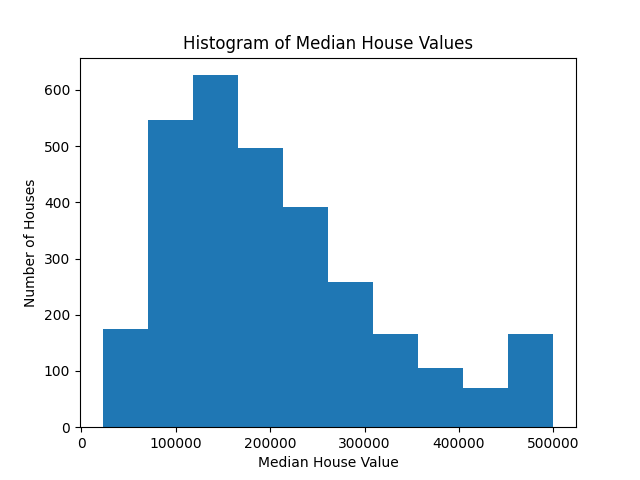

Output Files: 

File Name: median_house_value_counts.csv



In [ ]:
res = parse_output_files(response["output_files"])

In [ ]:
def convert_csv_to_hist(res):
  # convert data to np array
  hist_data=[]
  res_arr = res.split('\n')
  for arr in res_arr[1:]:
    median_val_count = arr.split(',')
    if not '' in median_val_count:
      median_val_count_float = [float(i) for i in median_val_count]
      hist_data.append(median_val_count_float)
  hist_data_sorted = sorted(hist_data,key=lambda x: x[0])
  hist_data_sorted_np=np.array(hist_data_sorted)

  # convert np array to bar chart data
  hist_data_final=[]
  bin_len = int(len(hist_data_sorted)/9)
  for i in range(0,len(hist_data_sorted),bin_len):
    temp_arr = hist_data_sorted_np[i:i+bin_len-1,:]
    bin_center = np.mean(temp_arr[:, 0])
    bin_count = np.sum(temp_arr[:, 1])
    hist_data_final.append([int(bin_center),int(bin_count)])
  hist_data_final.insert(0,res_arr[0].split(','))
  return hist_data_final

In [ ]:
hist_data_final = convert_csv_to_hist(res)
hist_data_final

[['median_house_value', 'count'],
 [65344, 288],
 [98957, 403],
 [131601, 380],
 [161468, 400],
 [190727, 310],
 [224597, 317],
 [262999, 283],
 [316138, 255],
 [405905, 224],
 [500000, 129]]

Debugging Tip: if median_house_value_counts.csv is not returned from the previous step, this convert_csv_hist function will fail. To temporarily bypass it, you can set hist_data_final to the data below. You can continue running the rest of the notebook this way. Later, you can come back and try the prompt above again or modify the prompt to get the median_house_value_counts.csv.



```
hist_data_final=
[['median_house_value', 'count'],
 [65344, 288],
 [98957, 403],
 [131601, 380],
 [161468, 400],
 [190727, 310],
 [224597, 317],
 [262999, 283],
 [316138, 255],
 [405905, 224],
 [500000, 129]]
```



### Step 3: Use Vertex AI Search Extension to Research on Housing Opportunities

You need to ingest housing research pdfs to a Vertex AI search engine before you run the step below. This is how you build it.


* Step 1: [Download PDFs and Ingest into a GCS Bucket](https://cloud.google.com/storage/docs/uploading-objects#upload-object-console)
* Step 2: [Create a Search Data Store with the GCS bucket](https://cloud.google.com/generative-ai-app-builder/docs/create-data-store-es#cloud-storage)
* Step 3: [Create Search Engine and Connect it to the Datastore above](https://cloud.google.com/generative-ai-app-builder/docs/create-engine-es#create-app)

For your reference, here are the pdfs that I use for this notebook:
[PDF1](https://crsreports.congress.gov/product/pdf/R/R47617)
[PDF2](https://crsreports.congress.gov/product/pdf/IF/IF11327)
[PDF3](https://www.whitehouse.gov/wp-content/uploads/2024/03/ERP-2024-CHAPTER-4.pdf)
[PDF4](https://www.hcd.ca.gov/policy-research/plans-reports/docs/sha_final_combined.pdf)

 Please grant the [Vertex AI Extension Service agent](https://cloud.google.com/vertex-ai/docs/general/access-control#service-agents) the [permission needed](https://cloud.google.com/vertex-ai/docs/general/access-control#home-project). In this case, you need permissions to run discovery engine.

#### Set Up Vertex AI Search Extension and Extracted Answers

In [ ]:
SEARCH_ENGINE_ID = "your search engine id"  # Replace this with your search engine ID from Vertex AI Search
SEARCH_ENGINE_REGION = "your search engine region"  # Replace this with the region that your search engine is located in

SEARCH_CONFIG  = "projects/{project_id}/locations/{search_engine_region}/collections/default_collection/engines/{search_engine_id}/servingConfigs/default_search".format(project_id=PROJECT_ID, search_engine_region=SEARCH_ENGINE_REGION, search_engine_id=SEARCH_ENGINE_ID)

In [ ]:
extension_vertex_ai_search = extensions.Extension.from_hub(
    "vertex_ai_search",
    runtime_config={
        "vertex_ai_search_runtime_config": {
            "serving_config_name": SEARCH_CONFIG,
        }
    })

extension_vertex_ai_search

INFO:vertexai.extensions._extensions:Creating Extension
INFO:vertexai.extensions._extensions:Create Extension backing LRO: projects/656421903914/locations/us-central1/extensions/895864482125840384/operations/8918982172669378560
INFO:vertexai.extensions._extensions:Extension created. Resource name: projects/656421903914/locations/us-central1/extensions/895864482125840384
INFO:vertexai.extensions._extensions:To use this Extension in another session:
INFO:vertexai.extensions._extensions:extension = vertexai.preview.extensions.Extension('projects/656421903914/locations/us-central1/extensions/895864482125840384')


resource name: projects/656421903914/locations/us-central1/extensions/895864482125840384

In [ ]:
QUERY = "Summarize investment opportunities in housing market in 4 bullet points" # @param {type:"string"}

 Please grant the [Vertex AI Extension Service agent](https://cloud.google.com/vertex-ai/docs/general/access-control#service-agents) the [permission needed](https://cloud.google.com/vertex-ai/docs/general/access-control#home-project). In this case, you need permissions to run discovery engine.

In [ ]:
vertex_ai_search_response = extension_vertex_ai_search.execute(
    operation_id = "search",
    operation_params = {"query": QUERY},
)

In [ ]:
list_extractive_answers=[]
for i in vertex_ai_search_response:
    list_extractive_answers.append(i["extractive_answers"][0])
    print(i["extractive_answers"][0])

An increase in housing value encourages homeowners to spend more than they do at other times for a variety of reasons, including higher confidence in the economy, increased home equity for homeowners to borrow against, and higher rental income. A decrease in prices results in the opposite.
A few key points are summarized below. • When accounting for population, the housing stock (total number of housing units) remained largely unchanged between 1980 and 2022. • Across rental and owner-occupied markets, vacancy rates have decreased since the housing market crash and financial crisis of 2007-2009.
Historically, interest rates have fluctuated between 4 and 8 percent. Equity, mostly from private investors, fills the gap between debt and project costs. Housing development equity is a relatively risky investment class due to the time required for projects to generate rev enue.
Developing in high cost areas to ease demand vs. lower cost-per-unit investments in other markets The state&#39;s ur

#### Summarize Extracted Answers to Bullet Points

In [ ]:
model = GenerativeModel(model_name="gemini-1.0-pro")
summary_response = model.generate_content(f"{QUERY} from the content below: {list_extractive_answers}")

In [ ]:
def to_bullet_points(text):
  text = text.replace('**','')
  text = text.replace('* ','• ')
  text = text.replace('\n','\n\n')
  return text

In [ ]:
deck_text = to_bullet_points(summary_response.text)
deck_text

'• Rising housing values: Encourage homeowner spending and potential for appreciation.\n\n• Decreasing housing stock: Limited supply can lead to increased demand and higher prices.\n\n• Low vacancy rates: Indicate strong rental demand, creating opportunities for investors in rental properties.\n\n• Development in high-cost areas: High demand in urban areas can support premium investment opportunities despite higher development costs.'

### Step 4: Add Data Analysis and Research to the Slide Deck

#### Update the Histogram Chart with the Housing Value Data

In [ ]:
SLIDE_DECK_ID = "your slide deck id"  # Replace this with your slide deck id
SHEET_ID = "your sheet id" # Replace this with your sheet id
SLIDE_PAGE1_ID = "page 1 id of your slide deck" # Replace this with page 1 id of the slide deck
SLIDE_PAGE2_ID = "page 2 id of your slide deck" # Replace this with page 1 id of the slide deck
def update_values(spreadsheet_id, range_name, value_input_option, values,creds):

  try:
    service = build("sheets", "v4", credentials=creds)
    body = {"values": values}
    result = (
        service.spreadsheets()
        .values()
        .update(
            spreadsheetId=spreadsheet_id,
            range=range_name,
            valueInputOption=value_input_option,
            body=body,
        )
        .execute()
    )
    print(f"{result.get('updatedCells')} cells updated.")
    return result
  except HttpError as error:
    print(f"An error occurred: {error}")
    return error

# Add data into the sheet to update the chart
update_values(
      SHEET_ID,
      "A1:B11",
      "USER_ENTERED",
      hist_data_final,creds
  )

22 cells updated.


{'spreadsheetId': '19R9eaKpc0VGZkuyCfbqrfXPWjv_dl4kn6go-W2VXXPY',
 'updatedRange': 'Sheet1!A1:B11',
 'updatedRows': 11,
 'updatedColumns': 2,
 'updatedCells': 22}

#### Add the Histogram Chart to the Slide Template

In [ ]:
def get_chart_id(
        spreadsheet_id,creds):
    spreadsheet_id = spreadsheet_id
    ranges = []
    include_grid_data = False

    service = build("sheets", "v4", credentials=creds)
    request = service.spreadsheets().get(
        spreadsheetId=spreadsheet_id,
        ranges=ranges,
        includeGridData=include_grid_data)
    response = request.execute()

    chart_id_list = []
    for chart in response['sheets'][0]['charts']:
        chart_id_list.append(chart['chartId'])
    return chart_id_list

In [ ]:
def add_chart_to_slides(
        presentation_id,
        spreadsheet_id,page_id,creds):
    emu4m = {
        'magnitude': 4000000,
        'unit': 'EMU'
    }

    sheet_chart_id_list = get_chart_id(
        spreadsheet_id,creds)

    presentation_chart_id = str(uuid.uuid4())
    requests = [
            {
        'createSheetsChart': {
            'objectId': presentation_chart_id,
            'spreadsheetId': spreadsheet_id,
            'chartId': sheet_chart_id_list[0],
            'linkingMode': 'LINKED',
            'elementProperties': {
                'pageObjectId': page_id,
                'size': {
                    'height': emu4m,
                    'width': emu4m
                },
                'transform': {
                    'scaleX': 1.5,
                    'scaleY': 1.5,
                    'translateX': 1000000,
                    'translateY': 100000,
                    'unit': 'EMU'
                }
            }
        }
        }
        ]

    body = {
        'requests': requests
    }
    service = build("slides", "v1", credentials=creds)
    service.presentations().batchUpdate(
        presentationId=presentation_id,
        body=body).execute()

add_chart_to_slides(SLIDE_DECK_ID, SHEET_ID,SLIDE_PAGE2_ID,creds)

#### Add Housing Research Summary from Vertex AI Search Extension to the Slide

In [ ]:
def replace_text_in_slides(
        presentation_id,
        deck_text,creds):
  try:
    service = build("slides", "v1", credentials=creds)
    presentation_id = SLIDE_DECK_ID # you need to use the presentation id of your slide

    requests = [
            {
          "replaceAllText": { # Replaces all instances of text matching a criteria with replace text. # Replaces all instances of specified text.
          "containsText": { # A criteria that matches a specific string of text in a shape or table. # Finds text in a shape matching this substring.
            "matchCase": True, # Indicates whether the search should respect case: - `True`: the search is case sensitive. - `False`: the search is case insensitive.
            "text": "{{replace_text}}", # The text to search for in the shape or table.
          },
          "pageObjectIds": [ # If non-empty, limits the matches to page elements only on the given pages. Returns a 400 bad request error if given the page object ID of a notes master, or if a page with that object ID doesn't exist in the presentation.
            SLIDE_PAGE1_ID,
          ],
          "replaceText": deck_text, # The text that will replace the matched text.
        }
            }
        ]

    body = {
        'requests': requests
    }
    service.presentations().batchUpdate(
        presentationId=presentation_id,
        body=body).execute()
  except HttpError as err:
    print(err)

replace_text_in_slides(SLIDE_DECK_ID,deck_text,creds)

### Step 5: Email Slide Links to Stakeholders

In [ ]:
def send_email(creds):
  try:
    # create gmail api client
    service_gmail = build("gmail", "v1", credentials=creds)

    message = EmailMessage()
    # send the slide to the stakeholders
    message.set_content(f"Check out the latest report on housing trend: https://docs.google.com/presentation/d/{SLIDE_DECK_ID}")

    message["To"] = "your stakeholder email address" # replace this with the message to email address
    message["From"] = "your email address" # replace this with the message from email address
    message["Subject"] = "Housing Opportunities Analysis"

    # encoded message
    encoded_message = base64.urlsafe_b64encode(message.as_bytes()).decode()

    create_message = {"raw": encoded_message}
    send_message = (
        service_gmail.users()
        .messages()
        .send(userId="me", body=create_message)
        .execute()
    )
    print(f'Message Id: {send_message["id"]}')
  except HttpError as error:
    print(f"An error occurred: {error}")
    send_message = None

send_email(creds)

Message Id: 18ec45f70bf82a85


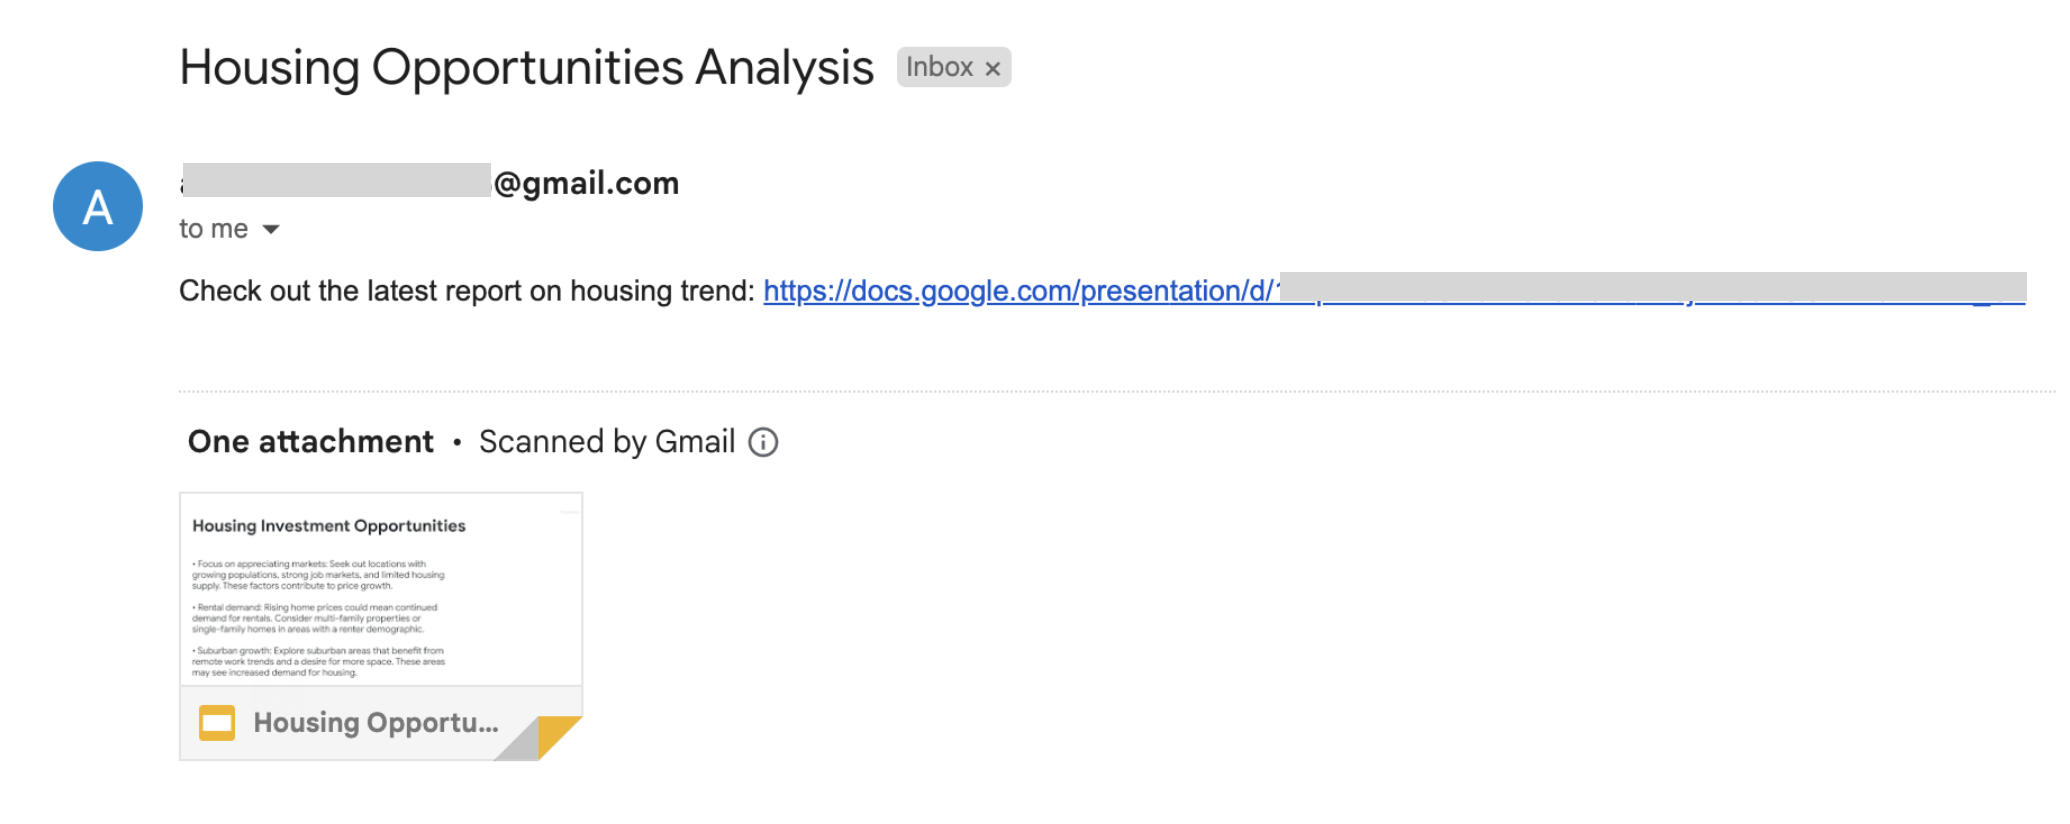

## Cleaning up

Clean up extension resources created in this notebook.

In [ ]:
extension_code_interpreter.delete()
extension_vertex_ai_search.delete()

INFO:google.cloud.aiplatform.base:Deleting Extension : projects/certain-haiku-391918/locations/us-central1/extensions/7053129597671440384
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/656421903914/locations/us-central1/operations/1050067723746279424
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/certain-haiku-391918/locations/us-central1/extensions/7053129597671440384
INFO:google.cloud.aiplatform.base:Deleting Extension : projects/certain-haiku-391918/locations/us-central1/extensions/1288522074637205504
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/656421903914/locations/us-central1/operations/1721667018177904640
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/certain-haiku-391918/locations/us-central1/extensions/1288522074637205504


Don't forget to delete any created assets if you don't need them, e.g.


*   Files in your Colab Environment
*   PDF Report in your Google Drive folder
*   Your Vertex Search Engine: https://console.cloud.google.com/gen-app-builder/apps
*   Your Data Store: https://console.cloud.google.com/gen-app-builder/data-stores
